# PySpark DataFrame

In [ ]:
import findspark
findspark.init()

In [2]:
import pyspark
from pyspark import SparkContext
sc = SparkContext(master="local", appName="New Spark Context")

In [3]:
sc

<SparkContext master=local appName=New Spark Context>

In [4]:
from pyspark.sql import Row, SQLContext

In [5]:
from pyspark.sql import SparkSession
spark = SparkSession(sc)

In [6]:
sqlContext = SQLContext(sc)

In [7]:
lst = [('John', 10), ('Lyna', 9), ('Samantha', 8), ('Tony', 10)]
rdd = sc.parallelize(lst)
people = rdd.map(lambda x: Row(name=x[0], marks=int(x[1])))
schemaPeople = sqlContext.createDataFrame(people)

In [8]:
schemaPeople

DataFrame[marks: bigint, name: string]

In [9]:
schemaPeople.show()

+-----+--------+
|marks|    name|
+-----+--------+
|   10|    John|
|    9|    Lyna|
|    8|Samantha|
|   10|    Tony|
+-----+--------+



In [10]:
file_name = 'hdfs://bigdata.laptrinhpython.net:19000/people.csv'

In [11]:
people = spark.read.csv(file_name, inferSchema = True, header = True)
people.show(5)

+---+---------+--------------+------+-------------+
|_c0|person_id|          name|   sex|date of birth|
+---+---------+--------------+------+-------------+
|  0|      100|Penelope Lewis|female|   1990-08-31|
|  1|      101| David Anthony|  male|   1971-10-14|
|  2|      102|     Ida Shipp|female|   1962-05-24|
|  3|      103|  Joanna Moore|female|   2017-03-10|
|  4|      104|Lisandra Ortiz|female|   2020-08-05|
+---+---------+--------------+------+-------------+
only showing top 5 rows



In [12]:
file_name = 'hdfs://bigdata.laptrinhpython.net:19000/data.json'

In [13]:
data = spark.read.json(file_name)
data.show(5)

+----------+--------------------+-------------+--------------------+--------------------+-------------------+
|        id|            location|sampling_rate|              sensor|    sensordatavalues|          timestamp|
+----------+--------------------+-------------+--------------------+--------------------+-------------------+
|5810744647|[112.6, FR, 0, 11...|         null|[22349, 1, [14, N...|[[12340422762, 1....|2019-12-20 03:22:01|
|5810744646|[35.2, DE, 0, 107...|         null|[21149, 7, [9, va...|[[12340422760, 9....|2019-12-20 03:22:01|
|5810744645|[51.0, DE, 0, 293...|         null|[5811, 1, [14, No...|[[12340422757, 6....|2019-12-20 03:22:01|
|5810744644|[34.4, BE, 0, 441...|         null|[8765, 1, [14, No...|[[12340422756, 3....|2019-12-20 03:22:01|
|5810744643|[5.0, FR, 0, 1100...|         null|[21693, 1, [14, N...|[[12340422754, 7....|2019-12-20 03:22:01|
+----------+--------------------+-------------+--------------------+--------------------+-------------------+
only showi

In [14]:
df = spark.read.csv('Cung cap du lieu buoi 3/Obesity_data.csv', inferSchema = True, header = True)

In [15]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- height: integer (nullable = true)
 |-- weight: integer (nullable = true)
 |-- bmi: double (nullable = true)
 |-- age: integer (nullable = true)
 |-- bmc: integer (nullable = true)
 |-- bmd: double (nullable = true)
 |-- fat: integer (nullable = true)
 |-- lean: integer (nullable = true)
 |-- pcfat: double (nullable = true)



In [16]:
df.show(5)

+---+------+------+------+----+---+----+----+-----+-----+-----+
| id|gender|height|weight| bmi|age| bmc| bmd|  fat| lean|pcfat|
+---+------+------+------+----+---+----+----+-----+-----+-----+
|  1|     F|   150|    49|21.8| 53|1312|0.88|17802|28600| 37.3|
|  2|     M|   165|    52|19.1| 65|1309|0.84| 8381|40229| 16.8|
|  3|     F|   157|    57|23.1| 64|1230|0.84|19221|36057| 34.0|
|  4|     F|   156|    53|21.8| 56|1171| 0.8|17472|33094| 33.8|
|  5|     M|   160|    51|19.9| 54|1681|0.98| 7336|40621| 14.8|
+---+------+------+------+----+---+----+----+-----+-----+-----+
only showing top 5 rows



In [17]:
df.count()

1217

In [18]:
df.describe().show()

+-------+-----------------+------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+
|summary|               id|gender|            height|           weight|               bmi|              age|               bmc|               bmd|               fat|             lean|             pcfat|
+-------+-----------------+------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+
|  count|             1217|  1217|              1217|             1217|              1217|             1217|              1217|              1217|              1217|             1217|              1217|
|   mean| 614.518488085456|  null| 156.7239112571898|55.14379622021364| 22.39539852095314|47.15201314708299|1724.9145439605588|1.0087428101889888|17288.436318816763| 35463.1133935908|31.60

In [19]:
df.describe('height', 'weight').show()

+-------+------------------+-----------------+
|summary|            height|           weight|
+-------+------------------+-----------------+
|  count|              1217|             1217|
|   mean| 156.7239112571898|55.14379622021364|
| stddev|7.9777256820417035|9.404988688010084|
|    min|               136|               34|
|    max|               185|               95|
+-------+------------------+-----------------+



In [20]:
df.crosstab('height', 'gender').show(10)

+-------------+---+---+
|height_gender|  F|  M|
+-------------+---+---+
|          138|  2|  0|
|          170|  1| 24|
|          142| 11|  0|
|          153| 73|  1|
|          174|  0|  2|
|          185|  0|  1|
|          157| 31|  5|
|          152| 54|  2|
|          164| 11| 17|
|          179|  0|  1|
+-------------+---+---+
only showing top 10 rows



In [21]:
df.groupby('gender').mean('weight').show()

+------+-----------------+
|gender|      avg(weight)|
+------+-----------------+
|     F|52.31090487238979|
|     M|62.02253521126761|
+------+-----------------+



In [22]:
df.groupby('gender').count().show()

+------+-----+
|gender|count|
+------+-----+
|     F|  862|
|     M|  355|
+------+-----+



In [23]:
df.groupby('gender').agg({'weight':'mean'}).show() #dictionary: key: attribute, value: function

+------+-----------------+
|gender|      avg(weight)|
+------+-----------------+
|     F|52.31090487238979|
|     M|62.02253521126761|
+------+-----------------+



In [24]:
df.groupby('gender').agg({'weight':'min', 'height':'min'}).show()

+------+-----------+-----------+
|gender|min(weight)|min(height)|
+------+-----------+-----------+
|     F|         34|        136|
|     M|         38|        146|
+------+-----------+-----------+



In [25]:
df_sub = df.select('id','gender','height','weight')
df_sub.show(3)

+---+------+------+------+
| id|gender|height|weight|
+---+------+------+------+
|  1|     F|   150|    49|
|  2|     M|   165|    52|
|  3|     F|   157|    57|
+---+------+------+------+
only showing top 3 rows



In [26]:
df_sub.select('gender').distinct().show()

+------+
|gender|
+------+
|     F|
|     M|
+------+



In [27]:
# How many distinct value of 'weight' column?
df_sub.select('weight').distinct().count()

55

In [28]:
# How many distinct value of 'height' column?
df_sub.select('height').distinct().count()

48

In [29]:
df.orderBy(df.age.desc()).show(3)

+---+------+------+------+----+---+----+----+-----+-----+-----+
| id|gender|height|weight| bmi|age| bmc| bmd|  fat| lean|pcfat|
+---+------+------+------+----+---+----+----+-----+-----+-----+
|963|     M|   158|    61|24.4| 88|1670|1.02|18038|39526| 30.5|
|712|     M|   161|    47|18.1| 87|1678|1.01|12328|32725| 26.4|
|588|     F|   142|    46|22.8| 85| 875|0.68|13946|31026| 30.4|
+---+------+------+------+----+---+----+----+-----+-----+-----+
only showing top 3 rows



In [30]:
df_sub.withColumn('bmi', (df_sub.weight/(df_sub.height/100)**2)).show(5)

+---+------+------+------+------------------+
| id|gender|height|weight|               bmi|
+---+------+------+------+------------------+
|  1|     F|   150|    49| 21.77777777777778|
|  2|     M|   165|    52|19.100091827364558|
|  3|     F|   157|    57|23.124670372023203|
|  4|     F|   156|    53|  21.7784352399737|
|  5|     M|   160|    51|19.921874999999996|
+---+------+------+------+------------------+
only showing top 5 rows



In [62]:
df_sub = df_sub.withColumn('bmi', (df_sub.weight/(df_sub.height/100)**2))

In [31]:
df_sub.withColumnRenamed('gender',' sex').show(3)

+---+----+------+------+
| id| sex|height|weight|
+---+----+------+------+
|  1|   F|   150|    49|
|  2|   M|   165|    52|
|  3|   F|   157|    57|
+---+----+------+------+
only showing top 3 rows



In [32]:
df.columns 

['id',
 'gender',
 'height',
 'weight',
 'bmi',
 'age',
 'bmc',
 'bmd',
 'fat',
 'lean',
 'pcfat']

In [33]:
df.drop('bmi','lean').columns

['id', 'gender', 'height', 'weight', 'age', 'bmc', 'bmd', 'fat', 'pcfat']

In [34]:
people.count()

100000

In [35]:
people.dropDuplicates().count() # No duplicate values

100000

In [36]:
people.dropna().count() # Drop and count null values

98080

In [37]:
# Return rows where name starts with 'I' & ends with 'p'
people_sub = people.filter(people.name.like('I%p'))
people_sub.count()

7

In [38]:
people_sub.show()

+-----+---------+-------------+------+-------------+
|  _c0|person_id|         name|   sex|date of birth|
+-----+---------+-------------+------+-------------+
|    2|      102|    Ida Shipp|female|   1962-05-24|
| 5791|     5891| Isaias Stepp|  male|   1974-04-13|
| 9965|    10065| Isabel Sharp|female|   1967-11-28|
|58576|    58676|Isadora Tripp|female|   1971-06-05|
|68125|    68225|   Irene Kulp|female|   1986-07-06|
|71572|    71672|    Ivan Ropp|  male|   1975-07-08|
|92061|    92161|   Inez Estep|female|   1925-09-03|
+-----+---------+-------------+------+-------------+



In [39]:
# Return rows where name starts with 'A' & ends with 'n'
people_sub = people.filter(people.name.like('A%n'))
people_sub.count()

1188

In [40]:
people_sub.show()

+----+---------+-----------------+------+-------------+
| _c0|person_id|             name|   sex|date of birth|
+----+---------+-----------------+------+-------------+
|  14|      114|Alejandro Brennan|  male|   1980-12-22|
| 163|      263|  Anthony Hampton|  male|   1988-08-23|
| 278|      378| Anderson Bushman|  male|   1969-06-29|
| 288|      388|   Aaron Peterson|  male|   2007-11-06|
| 330|      430|     Annis Benton|female|   1974-03-27|
| 336|      436|    Andrea Harden|female|   1917-09-20|
| 407|      507|    Amanda Hudman|female|   1952-04-10|
| 512|      612|  Alvin Henderson|  male|   2042-02-01|
| 518|      618|  Anthony Johnson|  male|   1963-07-01|
| 548|      648| Annabelle Obrien|female|   1964-04-19|
| 638|      738|   Antoine Nelson|  male|   1984-11-14|
| 678|      778|    Anthony Stein|  male|   1953-11-16|
| 886|      986|  Annie Templeton|female|   1939-10-03|
| 936|     1036|    Arlene Aragon|female|   1969-07-28|
| 955|     1055|Antoinette Martin|female|   2003

In [41]:
# Return rows where name contains 'Moore'
people_Moore = people.where(people.name.contains('Moore'))
people_Moore.count()

352

In [42]:
# Return rows where name doesn't contains 'Moore'
people_not_Moore = people.where(~people.name.contains('Moore'))
people_not_Moore.count()

99648

In [43]:
people_1999 = people.filter((people['date of birth'] >= '1999-01-01') & (people['date of birth'] <= '1999-12-31'))

In [44]:
people_1999.count()

1366

In [45]:
people_1999 = people.where((people['date of birth'] >= '1999-01-01') & (people['date of birth'] <= '1999-12-31'))

In [46]:
people_1999.count()

1366

In [47]:
from pyspark.sql.functions import *

In [48]:
people.withColumn('upper_name', upper(col('name'))).show(3)

+---+---------+--------------+------+-------------+--------------+
|_c0|person_id|          name|   sex|date of birth|    upper_name|
+---+---------+--------------+------+-------------+--------------+
|  0|      100|Penelope Lewis|female|   1990-08-31|PENELOPE LEWIS|
|  1|      101| David Anthony|  male|   1971-10-14| DAVID ANTHONY|
|  2|      102|     Ida Shipp|female|   1962-05-24|     IDA SHIPP|
+---+---------+--------------+------+-------------+--------------+
only showing top 3 rows



In [49]:
from pyspark.sql.types import *

In [50]:
people.withColumn('year', substring('date of birth', pos=0, len=4).cast(IntegerType())).show(3)

+---+---------+--------------+------+-------------+----+
|_c0|person_id|          name|   sex|date of birth|year|
+---+---------+--------------+------+-------------+----+
|  0|      100|Penelope Lewis|female|   1990-08-31|1990|
|  1|      101| David Anthony|  male|   1971-10-14|1971|
|  2|      102|     Ida Shipp|female|   1962-05-24|1962|
+---+---------+--------------+------+-------------+----+
only showing top 3 rows



In [51]:
people1 = people.withColumn('year', substring('date of birth', pos=0, len=4).cast(IntegerType()))
people1.show(5)

+---+---------+--------------+------+-------------+----+
|_c0|person_id|          name|   sex|date of birth|year|
+---+---------+--------------+------+-------------+----+
|  0|      100|Penelope Lewis|female|   1990-08-31|1990|
|  1|      101| David Anthony|  male|   1971-10-14|1971|
|  2|      102|     Ida Shipp|female|   1962-05-24|1962|
|  3|      103|  Joanna Moore|female|   2017-03-10|2017|
|  4|      104|Lisandra Ortiz|female|   2020-08-05|2020|
+---+---------+--------------+------+-------------+----+
only showing top 5 rows



In [52]:
people.withColumn('month', substring('date of birth', pos=6, len=2).cast(IntegerType())).show(3)

+---+---------+--------------+------+-------------+-----+
|_c0|person_id|          name|   sex|date of birth|month|
+---+---------+--------------+------+-------------+-----+
|  0|      100|Penelope Lewis|female|   1990-08-31|    8|
|  1|      101| David Anthony|  male|   1971-10-14|   10|
|  2|      102|     Ida Shipp|female|   1962-05-24|    5|
+---+---------+--------------+------+-------------+-----+
only showing top 3 rows



In [53]:
people1 = people1.withColumn('month', substring('date of birth', pos=6, len=2).cast(IntegerType()))
people1.show(5)

+---+---------+--------------+------+-------------+----+-----+
|_c0|person_id|          name|   sex|date of birth|year|month|
+---+---------+--------------+------+-------------+----+-----+
|  0|      100|Penelope Lewis|female|   1990-08-31|1990|    8|
|  1|      101| David Anthony|  male|   1971-10-14|1971|   10|
|  2|      102|     Ida Shipp|female|   1962-05-24|1962|    5|
|  3|      103|  Joanna Moore|female|   2017-03-10|2017|    3|
|  4|      104|Lisandra Ortiz|female|   2020-08-05|2020|    8|
+---+---------+--------------+------+-------------+----+-----+
only showing top 5 rows



In [54]:
people.withColumn('day', substring('date of birth', pos=9, len=2).cast(IntegerType())).show(3)

+---+---------+--------------+------+-------------+---+
|_c0|person_id|          name|   sex|date of birth|day|
+---+---------+--------------+------+-------------+---+
|  0|      100|Penelope Lewis|female|   1990-08-31| 31|
|  1|      101| David Anthony|  male|   1971-10-14| 14|
|  2|      102|     Ida Shipp|female|   1962-05-24| 24|
+---+---------+--------------+------+-------------+---+
only showing top 3 rows



In [59]:
people1 = people1.withColumn('day', substring('date of birth', pos=6, len=2).cast(IntegerType()))
people1.show(5)

+---+---------+--------------+------+-------------+----+-----+---+
|_c0|person_id|          name|   sex|date of birth|year|month|day|
+---+---------+--------------+------+-------------+----+-----+---+
|  0|      100|Penelope Lewis|female|   1990-08-31|1990|    8|  8|
|  1|      101| David Anthony|  male|   1971-10-14|1971|   10| 10|
|  2|      102|     Ida Shipp|female|   1962-05-24|1962|    5|  5|
|  3|      103|  Joanna Moore|female|   2017-03-10|2017|    3|  3|
|  4|      104|Lisandra Ortiz|female|   2020-08-05|2020|    8|  8|
+---+---------+--------------+------+-------------+----+-----+---+
only showing top 5 rows



In [55]:
df.select(df.height, when(df.height <= 150, 'Short')).show(5)

+------+----------------------------------------+
|height|CASE WHEN (height <= 150) THEN Short END|
+------+----------------------------------------+
|   150|                                   Short|
|   165|                                    null|
|   157|                                    null|
|   156|                                    null|
|   160|                                    null|
+------+----------------------------------------+
only showing top 5 rows



In [56]:
df.select(df.height, when(df.height<=150, 'Short').alias('Type')).show(5)

+------+-----+
|height| Type|
+------+-----+
|   150|Short|
|   165| null|
|   157| null|
|   156| null|
|   160| null|
+------+-----+
only showing top 5 rows



In [57]:
df.select(df.height, when(df.height <= 150, 'Short').when(df.height<=160, 'Medium')).show(5)

+------+-------------------------------------------------------------------------+
|height|CASE WHEN (height <= 150) THEN Short WHEN (height <= 160) THEN Medium END|
+------+-------------------------------------------------------------------------+
|   150|                                                                    Short|
|   165|                                                                     null|
|   157|                                                                   Medium|
|   156|                                                                   Medium|
|   160|                                                                   Medium|
+------+-------------------------------------------------------------------------+
only showing top 5 rows



In [58]:
df.select(df.height, when(df.height <= 150, 'Short').when(df.height<=160, 'Medium').otherwise('Tall').alias('Type')).show(5)

+------+------+
|height|  Type|
+------+------+
|   150| Short|
|   165|  Tall|
|   157|Medium|
|   156|Medium|
|   160|Medium|
+------+------+
only showing top 5 rows



In [60]:
def bmi_type(bmi):
    bmi_type = ''
    if bmi <= 18.5:
        bmi_type = 'Underweight'
    elif bmi <= 24.9:
        bmi_type = 'Normal weight'
    elif bmi <= 29.9:
        bmi_type = 'Overweight'
    else:
        bmi_type = 'Obesity'
    return bmi_type

In [63]:
udfBMI = udf(bmi_type, StringType())
df_sub.withColumn('bmi_type', udfBMI(df_sub.bmi)).show(3)

+---+------+------+------+------------------+-------------+
| id|gender|height|weight|               bmi|     bmi_type|
+---+------+------+------+------------------+-------------+
|  1|     F|   150|    49| 21.77777777777778|Normal weight|
|  2|     M|   165|    52|19.100091827364558|Normal weight|
|  3|     F|   157|    57|23.124670372023203|Normal weight|
+---+------+------+------+------------------+-------------+
only showing top 3 rows



In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
# Check the column names of df_sub
print('The column names of df_sub are', df_sub.columns)

# Convert to Pandas Dataframe
df_pandas = df_sub.toPandas()

The column names of df_sub are ['id', 'gender', 'height', 'weight', 'bmi']


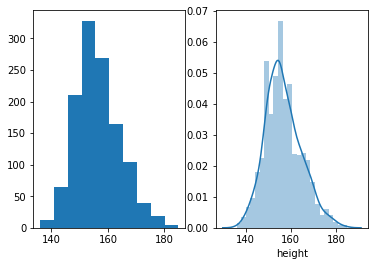

In [66]:
plt.subplot(1,2,1)
# Create a histogram
plt.hist(df_pandas['height'])
plt.subplot(1,2,2)
sns.distplot(df_pandas['height'])
plt.show()

# PySpark SQL

In [68]:
# Create a temporary table 'people'
people.createOrReplaceTempView('people')

In [69]:
# Construct a query to select the names of the people
# from the temporary table 'people'
query = 'SELECT name FROM people'

# Assign the result of Spark's query to people_df_names
people_df_names = spark.sql(query)

# Print the top 10 names of the people
people_df_names.show(10)

+----------------+
|            name|
+----------------+
|  Penelope Lewis|
|   David Anthony|
|       Ida Shipp|
|    Joanna Moore|
|  Lisandra Ortiz|
|   David Simmons|
|   Edward Hudson|
|    Albert Jones|
|Leonard Cavender|
|  Everett Vadala|
+----------------+
only showing top 10 rows



In [70]:
# Filter the people table to select female as sex
people_female_df = spark.sql('SELECT * FROM people WHERE sex=="female"')

# Filter the people table DataFrame to select male sex
people_male_df = spark.sql('SELECT * FROM people WHERE sex=="male"')

# Count the number of rows in both DataFrames
print('There are', people_female_df.count(), 'rows in the people_female_df and',
       people_male_df.count(), 'rows in the people_male_df')

There are 49014 rows in the people_female_df and 49066 rows in the people_male_df


In [71]:
people_Vadala = spark.sql('SELECT * FROM people WHERE name like "%Vadala"')
people_Vadala.show()

+-----+---------+--------------+------+-------------+
|  _c0|person_id|          name|   sex|date of birth|
+-----+---------+--------------+------+-------------+
|    9|      109|Everett Vadala|  male|   2005-05-24|
|77207|    77307| Marlyn Vadala|female|   1992-07-02|
+-----+---------+--------------+------+-------------+



In [73]:
name_sub = spark.sql('SELECT name,SUBSTRING(name, 8, 10) FROM people WHERE name like "Albert%"')
name_sub.show(10)

+-----------------+----------------------+
|             name|substring(name, 8, 10)|
+-----------------+----------------------+
|     Albert Jones|                 Jones|
|  Albert Guillory|              Guillory|
|    Albert Miller|                Miller|
|     Albert Goetz|                 Goetz|
|    Albert Clever|                Clever|
|   Albert Griffin|               Griffin|
|  Albert Amundsen|              Amundsen|
| Albert Pritchard|             Pritchard|
|    Albert Omeara|                Omeara|
|Albert Villarreal|            Villarreal|
+-----------------+----------------------+
only showing top 10 rows



In [74]:
# By SQL
spark.sql('SELECT name FROM people').show(5)

+--------------+
|          name|
+--------------+
|Penelope Lewis|
| David Anthony|
|     Ida Shipp|
|  Joanna Moore|
|Lisandra Ortiz|
+--------------+
only showing top 5 rows



In [77]:
# By DataFrame
people.select('name').show(5)

+--------------+
|          name|
+--------------+
|Penelope Lewis|
| David Anthony|
|     Ida Shipp|
|  Joanna Moore|
|Lisandra Ortiz|
+--------------+
only showing top 5 rows

